# Import libraries

In [2]:
import pandas as pd 
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Merge datasets

In [3]:
train=pd.read_csv('food_delivery/train.csv')
test=pd.read_csv('food_delivery/test.csv')
df=pd.concat([train,test]).reset_index(drop=True)

In [4]:
# clean data in Time_taken column by removing parts of text

df['Time_taken(min)']=df['Time_taken(min)'].str.replace('(min)','').astype(float)

In [5]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24.0
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33.0
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26.0
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21.0
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56987,0x6909,JAPRES01DEL01,35,4.6,26.905190,75.810753,27.015190,75.920753,27-03-2022,21:35:00,21:45:00,conditions Sunny,Jam,1,Snack,scooter,1,No,Metropolitian,NaN
56988,0x443b,JAPRES11DEL01,33,4.9,26.902940,75.793007,26.912940,75.803007,11-03-2022,11:40:00,11:45:00,conditions Sandstorms,High,1,Drinks,scooter,1,No,Metropolitian,NaN
56989,0x1ea5,SURRES11DEL03,NaN,NaN,21.157735,72.768778,21.217735,72.828778,11-03-2022,NaN,21:05:00,conditions NaN,NaN,3,Drinks,scooter,1,No,Metropolitian,NaN
56990,0x22d4,VADRES03DEL02,27,4.7,22.320000,73.170000,22.450000,73.300000,06-03-2022,18:35:00,18:40:00,conditions Sandstorms,Medium,0,Meal,motorcycle,0,No,Metropolitian,NaN


In [6]:
# adding another part of the dataset

sample=pd.read_csv('food_delivery/Sample_Submission.csv')
sample

,ID,Time_taken (min)
0,0x2318,25.668333
1,0x3474,27.881667
2,0x9420,27.023333
3,0x72ee,28.153333
4,0xa759,21.018333
...,...,...
11394,0x6909,21.972500
11395,0x443b,29.390000
11396,0x1ea5,26.244167
11397,0x22d4,23.752500


In [7]:
# merging datasets

df_merged=pd.merge(df,sample, how='left', on='ID')

In [8]:
df_merged

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Time_taken (min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,...,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24.0,NaN
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,...,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33.0,NaN
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,...,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26.0,NaN
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,...,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21.0,NaN
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,...,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56987,0x6909,JAPRES01DEL01,35,4.6,26.905190,75.810753,27.015190,75.920753,27-03-2022,21:35:00,...,conditions Sunny,Jam,1,Snack,scooter,1,No,Metropolitian,NaN,21.972500
56988,0x443b,JAPRES11DEL01,33,4.9,26.902940,75.793007,26.912940,75.803007,11-03-2022,11:40:00,...,conditions Sandstorms,High,1,Drinks,scooter,1,No,Metropolitian,NaN,29.390000
56989,0x1ea5,SURRES11DEL03,NaN,NaN,21.157735,72.768778,21.217735,72.828778,11-03-2022,NaN,...,conditions NaN,NaN,3,Drinks,scooter,1,No,Metropolitian,NaN,26.244167
56990,0x22d4,VADRES03DEL02,27,4.7,22.320000,73.170000,22.450000,73.300000,06-03-2022,18:35:00,...,conditions Sandstorms,Medium,0,Meal,motorcycle,0,No,Metropolitian,NaN,23.752500


In [9]:
df_merged['Time_taken(min)'].fillna(df_merged['Time_taken (min)'],inplace=True)

/var/folders/yc/k6jwrlhs0gldx0wl0rtkrrxh0000gn/T/ipykernel_27007/2071703276.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged['Time_taken(min)'].fillna(df_merged['Time_taken (min)'],inplace=True)


In [10]:
df_merged=df_merged.drop(columns=['Time_taken (min)'])

In [11]:
# saving the resulting dataset as a csv file

df_merged.to_csv('df_merged.csv')

### EDA

In [12]:
df_merged.describe(include='all')

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
count,56992,56992,56992,56992,56992.000000,56992.000000,56992.000000,56992.000000,56992,56992,56992,56992,56992,56992.000000,56992,56992,56992,56992,56992,56992.000000
unique,56992,1320,23,29,NaN,NaN,NaN,NaN,44,177,193,7,5,NaN,4,4,5,3,4,NaN
top,0x4607,INDORES13DEL02,35,4.8,NaN,NaN,NaN,NaN,19-03-2022,NaN,21:30:00,conditions Fog,Low,NaN,Snack,motorcycle,1,No,Metropolitian,NaN
freq,1,72,2809,8938,NaN,NaN,NaN,NaN,1440,2175,601,9422,19358,NaN,14348,33044,35224,55600,42590,NaN
mean,NaN,NaN,NaN,NaN,17.034171,70.264920,17.486049,70.897002,NaN,NaN,NaN,NaN,NaN,1.024968,NaN,NaN,NaN,NaN,NaN,26.282614
std,NaN,NaN,NaN,NaN,8.186784,22.861487,7.325665,21.034559,NaN,NaN,NaN,NaN,NaN,0.839171,NaN,NaN,NaN,NaN,NaN,9.196978
min,NaN,NaN,NaN,NaN,-30.905562,-88.400467,0.010000,0.010000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,10.000000
25%,NaN,NaN,NaN,NaN,12.933284,73.170283,12.989166,73.293329,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,19.000000
50%,NaN,NaN,NaN,NaN,18.551440,75.897429,18.636258,76.002471,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,25.000000
75%,NaN,NaN,NaN,NaN,22.728163,78.045359,22.785536,78.107053,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,32.000000


In [13]:
df = df_merged

### Data cleaning

In [14]:
# replace text values 'NaN' by actual null values

df.replace('NaN ', np.nan, inplace=True)

In [15]:
df.replace('NaN',np.nan, inplace=True)

In [16]:
df.shape

(56992, 20)

In [17]:
# analysing null values

df.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            2345
Delivery_person_Ratings        2415
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    2175
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density            755
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries            1231
Festival                        293
City                           1524
Time_taken(min)                   0
dtype: int64

# Data cleaning

### Clean data types

In [18]:
df['Weatherconditions']=df['Weatherconditions'].str.replace('conditions ','')

In [19]:
df['City_code']=df['Delivery_person_ID'].str.split('RES', expand=True)[0]

In [20]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),City_code
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,...,Sunny,High,2,Snack,motorcycle,0,No,Urban,24.000000,INDO
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,...,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33.000000,BANG
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,...,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26.000000,BANG
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,...,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21.000000,COIMB
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,...,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30.000000,CHEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56987,0x6909,JAPRES01DEL01,35,4.6,26.905190,75.810753,27.015190,75.920753,27-03-2022,21:35:00,...,Sunny,Jam,1,Snack,scooter,1,No,Metropolitian,21.972500,JAP
56988,0x443b,JAPRES11DEL01,33,4.9,26.902940,75.793007,26.912940,75.803007,11-03-2022,11:40:00,...,Sandstorms,High,1,Drinks,scooter,1,No,Metropolitian,29.390000,JAP
56989,0x1ea5,SURRES11DEL03,NaN,NaN,21.157735,72.768778,21.217735,72.828778,11-03-2022,NaN,...,NaN,NaN,3,Drinks,scooter,1,No,Metropolitian,26.244167,SUR
56990,0x22d4,VADRES03DEL02,27,4.7,22.320000,73.170000,22.450000,73.300000,06-03-2022,18:35:00,...,Sandstorms,Medium,0,Meal,motorcycle,0,No,Metropolitian,23.752500,VAD


In [21]:
df.replace('NaN',np.nan, inplace=True)

In [22]:
df['Weatherconditions'].isna().sum()

774

In [23]:
# replace NaN by actual null values

df.replace('NaN ',np.nan, inplace=True)

In [24]:
# update datatypes 

def update_datatype(df):
    df['Delivery_person_Age'] = df['Delivery_person_Age'].astype('float64')
    df['Delivery_person_Ratings']=df['Delivery_person_Ratings'].astype('float64')
    df['multiple_deliveries']=df['multiple_deliveries'].astype('float64')
    df['Order_Date']=pd.to_datetime(df['Order_Date'], format="%d-%m-%Y")

update_datatype(df)

In [25]:
# check for duplicate values 

df.duplicated().value_counts()

False    56992
Name: count, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56992 entries, 0 to 56991
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           56992 non-null  object        
 1   Delivery_person_ID           56992 non-null  object        
 2   Delivery_person_Age          54647 non-null  float64       
 3   Delivery_person_Ratings      54577 non-null  float64       
 4   Restaurant_latitude          56992 non-null  float64       
 5   Restaurant_longitude         56992 non-null  float64       
 6   Delivery_location_latitude   56992 non-null  float64       
 7   Delivery_location_longitude  56992 non-null  float64       
 8   Order_Date                   56992 non-null  datetime64[ns]
 9   Time_Orderd                  54817 non-null  object        
 10  Time_Order_picked            56992 non-null  object        
 11  Weatherconditions            56218 non-nu

### Replace null values

In [27]:
df.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            2345
Delivery_person_Ratings        2415
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    2175
Time_Order_picked                 0
Weatherconditions               774
Road_traffic_density            755
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries            1231
Festival                        293
City                           1524
Time_taken(min)                   0
City_code                         0
dtype: int64

In [28]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
ID,56992,56992,0x4607,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delivery_person_ID,56992,1320,INDORES13DEL02,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delivery_person_Age,54647.0,NaN,NaN,NaN,29.557176,15.0,25.0,30.0,35.0,50.0,5.811533
Delivery_person_Ratings,54577.0,NaN,NaN,NaN,4.633582,1.0,4.5,4.7,4.9,6.0,0.336603
Restaurant_latitude,56992.0,NaN,NaN,NaN,17.034171,-30.905562,12.933284,18.55144,22.728163,30.914057,8.186784
Restaurant_longitude,56992.0,NaN,NaN,NaN,70.26492,-88.400467,73.170283,75.897429,78.045359,88.433452,22.861487
Delivery_location_latitude,56992.0,NaN,NaN,NaN,17.486049,0.01,12.989166,18.636258,22.785536,31.054057,7.325665
Delivery_location_longitude,56992.0,NaN,NaN,NaN,70.897002,0.01,73.293329,76.002471,78.107053,88.563452,21.034559
Order_Date,56992,NaN,NaN,NaN,2022-03-13 16:37:43.896687360,2022-02-11 00:00:00,2022-03-04 00:00:00,2022-03-15 00:00:00,2022-03-27 00:00:00,2022-04-06 00:00:00,NaN
Time_Orderd,54817,176,21:55:00,572,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# replace null values
def handle_null_values(df):
    df['Delivery_person_Age'].fillna(np.random.choice(df['Delivery_person_Age']),inplace=True)
    df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].median(),inplace=True)
    df['Weatherconditions'].fillna(np.random.choice(df['Weatherconditions']),inplace=True)
    df['Road_traffic_density'].fillna(df['Road_traffic_density'].mode()[0], inplace=True)
    df['multiple_deliveries'].fillna(df['multiple_deliveries'].mode()[0],inplace=True)
    df['Festival'].fillna(df['Festival'].mode()[0],inplace=True)
    df['City'].fillna(df['City'].mode()[0],inplace=True)
handle_null_values(df)


/var/folders/yc/k6jwrlhs0gldx0wl0rtkrrxh0000gn/T/ipykernel_27007/2228634789.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Delivery_person_Age'].fillna(np.random.choice(df['Delivery_person_Age']),inplace=True)
/var/folders/yc/k6jwrlhs0gldx0wl0rtkrrxh0000gn/T/ipykernel_27007/2228634789.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate 

In [30]:
df.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    2175
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                              0
Time_taken(min)                   0
City_code                         0
dtype: int64

In [31]:
# convert time ordered and time order picked to date time

df['Time_Orderd']=pd.to_datetime(df['Time_Orderd'])
df['Time_Order_picked']=pd.to_datetime(df['Time_Order_picked'])

/var/folders/yc/k6jwrlhs0gldx0wl0rtkrrxh0000gn/T/ipykernel_27007/80555353.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time_Orderd']=pd.to_datetime(df['Time_Orderd'])
/var/folders/yc/k6jwrlhs0gldx0wl0rtkrrxh0000gn/T/ipykernel_27007/80555353.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time_Order_picked']=pd.to_datetime(df['Time_Order_picked'])


In [32]:
# calculate the difference between the two

df['Time_Difference'] = df['Time_Order_picked'] - df['Time_Orderd']

In [33]:
# convert the difference to minutes only

df['Time_Difference']=df['Time_Difference'].dt.seconds//60

In [34]:
# replace null values in Time_difference by median value

df['Time_Difference'].fillna(df['Time_Difference'].median(), inplace=True)

/var/folders/yc/k6jwrlhs0gldx0wl0rtkrrxh0000gn/T/ipykernel_27007/691558857.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Time_Difference'].fillna(df['Time_Difference'].median(), inplace=True)


In [35]:
# check for null values again, we should have a correct database

df.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    2175
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                              0
Time_taken(min)                   0
City_code                         0
Time_Difference                   0
dtype: int64

In [36]:
# create a new column 'Distance' and calculate it based on geocoordinates of restaurant and client

from geopy.distance import geodesic
def calculate_distance(df):
    df['distance']=np.zeros(len(df))
    restaurant_coordinates=df[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
    delivery_location_coordinates=df[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()
    df['distance']=np.array([geodesic(restaurant, delivery) for restaurant, delivery in zip (restaurant_coordinates, delivery_location_coordinates)])

calculate_distance(df)

In [37]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),City_code,Time_Difference,distance
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2024-04-17 11:30:00,...,2,Snack,motorcycle,0.0,No,Urban,24.0,INDO,15.0,3.020736643461066 km
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2024-04-17 19:45:00,...,2,Snack,scooter,1.0,No,Metropolitian,33.0,BANG,5.0,20.143736910348597 km
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2024-04-17 08:30:00,...,0,Drinks,motorcycle,1.0,No,Urban,26.0,BANG,15.0,1.5496929322394055 km
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,2024-04-17 18:00:00,...,0,Buffet,motorcycle,1.0,No,Metropolitian,21.0,COIMB,10.0,7.774496620087613 km
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2024-04-17 13:30:00,...,1,Snack,scooter,1.0,No,Metropolitian,30.0,CHEN,15.0,6.197897916874956 km


In [38]:
# transform distance to string to solve conversion errors

df['distance']=df['distance'].astype("str")

# replace 'km' by empty values

df['distance']=df['distance'].str.replace(' km','').astype(float)

# round the decimals to two

df['distance']=round(df['distance'],2)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56992 entries, 0 to 56991
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           56992 non-null  object        
 1   Delivery_person_ID           56992 non-null  object        
 2   Delivery_person_Age          56992 non-null  float64       
 3   Delivery_person_Ratings      56992 non-null  float64       
 4   Restaurant_latitude          56992 non-null  float64       
 5   Restaurant_longitude         56992 non-null  float64       
 6   Delivery_location_latitude   56992 non-null  float64       
 7   Delivery_location_longitude  56992 non-null  float64       
 8   Order_Date                   56992 non-null  datetime64[ns]
 9   Time_Orderd                  54817 non-null  datetime64[ns]
 10  Time_Order_picked            56992 non-null  datetime64[ns]
 11  Weatherconditions            56992 non-nu

In [40]:
df_distance = df[(df["distance"] > 50)]

In [41]:
df_distance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 545 entries, 92 to 56930
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           545 non-null    object        
 1   Delivery_person_ID           545 non-null    object        
 2   Delivery_person_Age          545 non-null    float64       
 3   Delivery_person_Ratings      545 non-null    float64       
 4   Restaurant_latitude          545 non-null    float64       
 5   Restaurant_longitude         545 non-null    float64       
 6   Delivery_location_latitude   545 non-null    float64       
 7   Delivery_location_longitude  545 non-null    float64       
 8   Order_Date                   545 non-null    datetime64[ns]
 9   Time_Orderd                  193 non-null    datetime64[ns]
 10  Time_Order_picked            545 non-null    datetime64[ns]
 11  Weatherconditions            545 non-null    ob

In [42]:
# drop all lines where distance is > 50 km, because it's definitely an error

df = df[~(df["distance"] > 50)]\
    .reset_index(drop=True).copy()

In [43]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Vehicle_condition,multiple_deliveries,Time_taken(min),Time_Difference,distance
count,56447.000000,56447.000000,56447.000000,56447.000000,56447.000000,56447.000000,56447,54624,56447,56447.000000,56447.000000,56447.000000,56447.000000,56447.000000
mean,29.279661,4.636308,17.394631,70.766797,17.458270,70.830435,2022-03-13 18:57:46.515492352,2024-04-17 17:55:10.753515008,2024-04-17 17:37:50.474958848,1.019186,0.751041,26.284477,9.999291,9.722918
min,15.000000,1.000000,0.000000,0.000000,0.010000,0.010000,2022-02-11 00:00:00,2024-04-17 00:00:00,2024-04-17 00:00:00,0.000000,0.000000,10.000000,5.000000,1.460000
25%,24.000000,4.500000,12.934179,73.170283,12.986113,73.280000,2022-03-04 00:00:00,2024-04-17 15:25:00,2024-04-17 14:35:00,0.000000,0.000000,19.000000,5.000000,4.650000
50%,29.000000,4.700000,18.554382,75.898497,18.632718,75.997522,2022-03-15 00:00:00,2024-04-17 19:15:00,2024-04-17 19:10:00,1.000000,1.000000,25.000000,10.000000,9.200000
75%,34.000000,4.800000,22.732225,78.045359,22.784648,78.102075,2022-03-27 00:00:00,2024-04-17 21:35:00,2024-04-17 21:35:00,2.000000,1.000000,32.000000,15.000000,13.660000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,2022-04-06 00:00:00,2024-04-17 23:55:00,2024-04-17 23:55:00,3.000000,3.000000,54.000000,15.000000,20.940000
std,5.860968,0.324959,7.330978,21.120667,7.332325,21.120977,NaN,NaN,NaN,0.833563,0.567868,9.199494,4.020353,5.598249


### Adding data about day of the week

In [44]:
# calculate day of the week (Monday = 0)

df['Day_week'] = df['Order_Date'].dt.dayofweek

In [45]:
df['Day_week'].value_counts()

Day_week
2    8769
4    8720
3    7879
1    7871
0    7770
5    7766
6    7672
Name: count, dtype: int64

In [46]:
# assign names to days of the week

df['Day_week_name'] = df['Day_week'].apply(lambda x:
                                       'Monday' if x == 0
                                       else 'Tuesday' if x == 1
                                       else 'Wednesday' if x == 2
                                       else 'Thursday' if x == 3
                                       else 'Friday' if x == 4
                                       else 'Saturday' if x == 5
                                       else 'Sunday' if x == 6
                                       else 'Other')

In [47]:
df['Day_week_name'].value_counts()

Day_week_name
Wednesday    8769
Friday       8720
Thursday     7879
Tuesday      7871
Monday       7770
Saturday     7766
Sunday       7672
Name: count, dtype: int64

In [48]:
# create a column 'Is_weekend' (weekend = Saturday or Sunday)

df['Is_weekend'] = df['Day_week'].apply(lambda x:
                                        'yes' if x in [5,6]
                                        else 'no')

In [49]:
df['Is_weekend'].value_counts()

Is_weekend
no     41009
yes    15438
Name: count, dtype: int64

In [50]:
# Extract the hour component as an integer
df['Hour'] = df['Time_Order_picked'].dt.hour

# Define time ranges and corresponding categories
time_ranges = [(0, 5), (6, 11), (12, 17), (18, 23)]
time_categories = ['night', 'morning', 'afternoon', 'evening']

# Create a lambda function to map hour to time category
get_time_category = lambda hour: next((category for (start, end), category in zip(time_ranges, time_categories) if start <= hour <= end), 'unknown')

# Apply the lambda function to create a new column 'Time_category'
df['Time_category'] = df['Hour'].apply(get_time_category)

In [51]:
df['Time_category'].value_counts()

Time_category
evening      35292
afternoon    10078
morning       9444
night         1633
Name: count, dtype: int64

In [52]:
df['Hour'].value_counts()

Hour
22    5974
21    5941
18    5912
20    5887
23    5804
19    5774
17    4560
10    2568
9     2523
11    2499
8     1854
0     1633
12    1412
15    1100
14    1023
13     995
16     988
Name: count, dtype: int64

In [53]:
# extract day features

def extract_date_features (df):
  df["day"] = df.Order_Date.dt.day
  df["month"]=df.Order_Date.dt.month
  df['is_year_end']=df.Order_Date.dt.is_year_end.astype(int)

extract_date_features(df)

In [54]:
df['multiple_deliveries'].value_counts()

multiple_deliveries
1.0    36090
0.0    17429
2.0     2480
3.0      448
Name: count, dtype: int64

In [55]:
df['month'].value_counts()

month
3    39650
2     8862
4     7935
Name: count, dtype: int64

In [56]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
ID,56447,56447,0x4607,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delivery_person_ID,56447,1320,INDORES01DEL02,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delivery_person_Age,56447.0,NaN,NaN,NaN,29.279661,15.0,24.0,29.0,34.0,50.0,5.860968
Delivery_person_Ratings,56447.0,NaN,NaN,NaN,4.636308,1.0,4.5,4.7,4.8,6.0,0.324959
Restaurant_latitude,56447.0,NaN,NaN,NaN,17.394631,0.0,12.934179,18.554382,22.732225,30.914057,7.330978
Restaurant_longitude,56447.0,NaN,NaN,NaN,70.766797,0.0,73.170283,75.898497,78.045359,88.433452,21.120667
Delivery_location_latitude,56447.0,NaN,NaN,NaN,17.45827,0.01,12.986113,18.632718,22.784648,31.054057,7.332325
Delivery_location_longitude,56447.0,NaN,NaN,NaN,70.830435,0.01,73.28,75.997522,78.102075,88.563452,21.120977
Order_Date,56447,NaN,NaN,NaN,2022-03-13 18:57:46.515492352,2022-02-11 00:00:00,2022-03-04 00:00:00,2022-03-15 00:00:00,2022-03-27 00:00:00,2022-04-06 00:00:00,NaN
Time_Orderd,54624,NaN,NaN,NaN,2024-04-17 17:55:10.753515008,2024-04-17 00:00:00,2024-04-17 15:25:00,2024-04-17 19:15:00,2024-04-17 21:35:00,2024-04-17 23:55:00,NaN


# Visuals

### Number of orders by city

In [57]:
# Group the data by 'Delivery_city' and count the number of unique 'Delivery_person_ID'
delivery_counts = df.groupby('City_code')['ID'].nunique().reset_index()

# Create a bar chart using Plotly Express
fig = px.bar(delivery_counts, x='City_code', y='ID',
             title='Number of Orders in Each City',
             labels={'City_code': 'City', 'ID': 'Number of Orders'})

# Show the plot
fig.show()

### Distribution of delivery people by city

In [58]:
# Group the data by 'Delivery_city' and count the number of unique 'Delivery_person_ID'
delivery_counts = df.groupby('City_code')['Delivery_person_ID'].nunique().reset_index()

# Create a bar chart using Plotly Express
fig = px.bar(delivery_counts, x='City_code', y='Delivery_person_ID',
             title='Number of Delivery People in Each City',
             labels={'City_code': 'City', 'Delivery_person_ID': 'Number of Delivery People'})

# Show the plot
fig.show()

/var/folders/yc/k6jwrlhs0gldx0wl0rtkrrxh0000gn/T/ipykernel_27007/2206297458.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




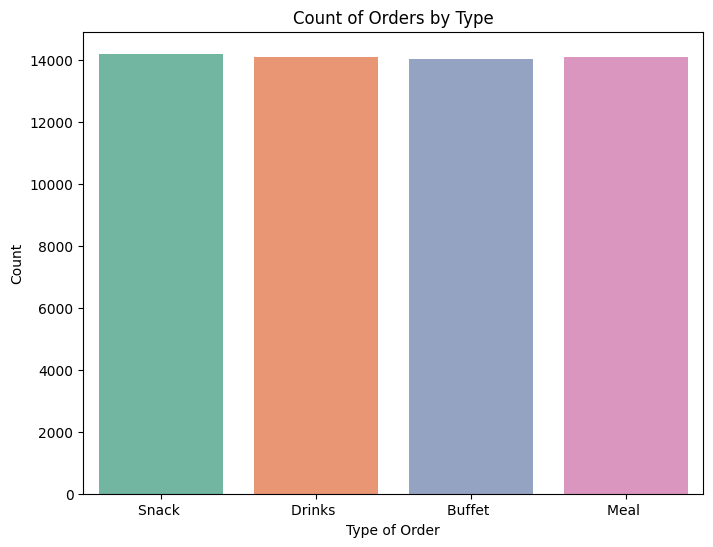

In [59]:
plt.figure(figsize=(8, 6), dpi=100)
sns.countplot(data=df, x='Type_of_order', palette='Set2')  # Change 'Set2' to any other palette you prefer
plt.title('Count of Orders by Type')
plt.xlabel('Type of Order')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Time_category', ylabel='count'>

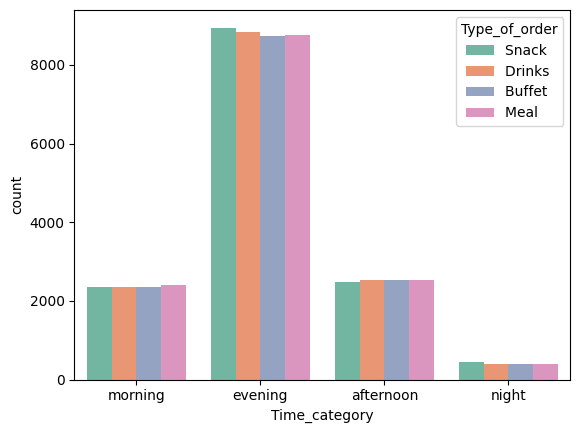

In [60]:
sns.countplot(x=df.Time_category,hue=df.Type_of_order, palette = 'Set2')

### Distribution of transportation modes

In [61]:
# create a df for analysing vehicle types

df_vehicles = pd.DataFrame(list(df['Type_of_vehicle'].value_counts().items()), 
                                  columns=['Type_of_vehicle', 'count'])

# Optionally, set the index to 'Road_traffic_density'
# df_counts.set_index('Road_traffic_density', inplace=True)

df_vehicles.info()

# Creating a pie chart using Plotly Express
fig = px.pie(df_vehicles, 
             names='Type_of_vehicle', 
             values='count', 
             title='Vehicle types Distribution Pie Chart')

# Show the plot
fig.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Type_of_vehicle  4 non-null      object
 1   count            4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


/Users/annaborodina/Library/Python/3.9/lib/python/site-packages/plotly/express/_core.py:1871: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



### Analyse the ratings of delivery people

In [62]:
# analyse the rating of delivery people

# create a df for analysing ratings

df_ratings = pd.DataFrame(list(df['Delivery_person_Ratings'].value_counts().items()), 
                                  columns=['Delivery_person_Ratings', 'count'])

# Optionally, set the index to 'Road_traffic_density'
# df_counts.set_index('Road_traffic_density', inplace=True)

df_ratings.info()

fig = go.Figure(
    data = go.Bar(x = df_ratings['Delivery_person_Ratings'], 
                  y = df_ratings['count']
                                   
                  )
)

fig.update_layout(title='Delivery person ratings distribution')

fig.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Ratings  28 non-null     float64
 1   count                    28 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 576.0 bytes


In [63]:
df['Delivery_person_Age'].mean()

29.279660566549154

In [64]:
# analyse the rating of delivery people

# create a df for analysing ratings

df_age = pd.DataFrame(list(df['Delivery_person_Age'].value_counts().items()), 
                                  columns=['Delivery_person_Age', 'count'])


df_age.info()

fig = go.Figure(
    data = go.Bar(x = df_age['Delivery_person_Age'], 
                  y = df_age['count']
                                   
                  )
)

fig.update_layout(title='Delivery person age distribution')

fig.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Delivery_person_Age  22 non-null     float64
 1   count                22 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


### Average delivery time analysis

#### Average delivery time on weekdays vs weekends

In [65]:
# Group the data by 'Is_weekend' and calculate the average time taken
avg_time_taken = df.groupby('Is_weekend')['Time_taken(min)'].mean().round(2).reset_index()

# Create a bar chart using Plotly Express
fig = px.bar(avg_time_taken, x='Is_weekend', y='Time_taken(min)', 
             title='Average Delivery Time on Weekdays vs Weekends',
             labels={'Is_weekend': 'Is Weekend', 'Time_taken(min)': 'Average Time Taken (minutes)'},
             text='Time_taken(min)')

# Show the plot
fig.show()

#### Average delivery time by day of the week

In [66]:
# Group the data by 'Is_weekend' and calculate the average time taken
avg_time_taken = df.groupby('Day_week_name')['Time_taken(min)'].mean().round(2).reset_index()

# Create a bar chart using Plotly Express
fig = px.bar(avg_time_taken, x='Day_week_name', y='Time_taken(min)', 
             title='Average Delivery Time by day of the week',
             labels={'Day_week_name': 'Day of the week', 'Time_taken(min)': 'Average Time Taken (minutes)'},
             text='Time_taken(min)')

# Show the plot
fig.show()

In [67]:
# Group the data by 'Is_weekend' and calculate the average time taken
avg_time_taken = df.groupby('Weatherconditions')['Time_taken(min)'].mean().round(2).reset_index()
avg_time_taken = avg_time_taken.sort_values(by='Time_taken(min)')

# Create a bar chart using Plotly Express
fig = px.bar(avg_time_taken, x='Weatherconditions', y='Time_taken(min)', 
             title='Average Delivery Time by weather conditions',
             labels={'Weatherconditions': 'Weather', 'Time_taken(min)': 'Average Time Taken (minutes)'},
             text='Time_taken(min)')

# Show the plot
fig.show()

In [68]:
# Group the data by 'Is_weekend' and calculate the average time taken
avg_time_taken = df.groupby('Hour')['Time_taken(min)'].mean().round(2).reset_index()
avg_time_taken = avg_time_taken.sort_values(by='Time_taken(min)')

# Create a bar chart using Plotly Express
fig = px.bar(avg_time_taken, x='Hour', y='Time_taken(min)', 
             title='Average Delivery Time by hour of order',
             labels={'Hour': 'Hour of order', 'Time_taken(min)': 'Average Time Taken (minutes)'},
             text='Time_taken(min)')

# Show the plot
fig.show()

In [69]:
# Group the data by 'Is_weekend' and calculate the average time taken
avg_time_taken = df.groupby('Type_of_vehicle')['Time_taken(min)'].mean().round(2).reset_index()
avg_time_taken = avg_time_taken.sort_values(by='Time_taken(min)')

# Create a bar chart using Plotly Express
fig = px.bar(avg_time_taken, x='Type_of_vehicle', y='Time_taken(min)', 
             title='Average Delivery Time by type of vehicle',
             labels={'Type_of_vehicle': 'Vehicle', 'Time_taken(min)': 'Average Time Taken (minutes)'},
             text='Time_taken(min)')

# Show the plot
fig.show()

In [70]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
ID,56447,56447,0x4607,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delivery_person_ID,56447,1320,INDORES01DEL02,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delivery_person_Age,56447.0,NaN,NaN,NaN,29.279661,15.0,24.0,29.0,34.0,50.0,5.860968
Delivery_person_Ratings,56447.0,NaN,NaN,NaN,4.636308,1.0,4.5,4.7,4.8,6.0,0.324959
Restaurant_latitude,56447.0,NaN,NaN,NaN,17.394631,0.0,12.934179,18.554382,22.732225,30.914057,7.330978
Restaurant_longitude,56447.0,NaN,NaN,NaN,70.766797,0.0,73.170283,75.898497,78.045359,88.433452,21.120667
Delivery_location_latitude,56447.0,NaN,NaN,NaN,17.45827,0.01,12.986113,18.632718,22.784648,31.054057,7.332325
Delivery_location_longitude,56447.0,NaN,NaN,NaN,70.830435,0.01,73.28,75.997522,78.102075,88.563452,21.120977
Order_Date,56447,NaN,NaN,NaN,2022-03-13 18:57:46.515492352,2022-02-11 00:00:00,2022-03-04 00:00:00,2022-03-15 00:00:00,2022-03-27 00:00:00,2022-04-06 00:00:00,NaN
Time_Orderd,54624,NaN,NaN,NaN,2024-04-17 17:55:10.753515008,2024-04-17 00:00:00,2024-04-17 15:25:00,2024-04-17 19:15:00,2024-04-17 21:35:00,2024-04-17 23:55:00,NaN


# Correlation matrix

In [71]:

num_columns = df[['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition', 'multiple_deliveries', 
                  'Day_week', 'distance', 'Time_taken(min)']]

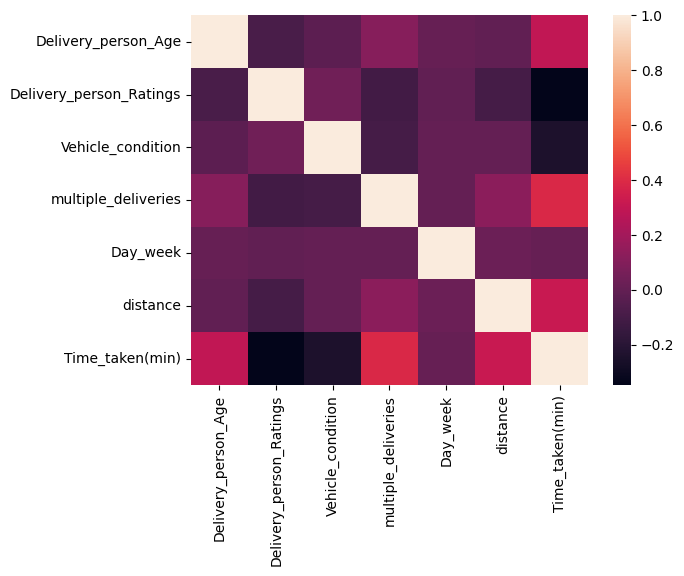

In [72]:
sns.heatmap(num_columns.corr()) ;

In [73]:
df.to_csv('clean_data_v2.csv')

In [74]:
df_bicycle = df[df['Type_of_vehicle'] == 'bicycle ']
df_bicycle

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Time_Difference,distance,Day_week,Day_week_name,Is_weekend,Hour,Time_category,day,month,is_year_end
1133,0x1066,MYSRES05DEL01,22.0,4.7,12.323978,76.627961,12.363978,76.667961,2022-03-19,NaT,...,10.0,6.21,5,Saturday,yes,14,afternoon,19,3,0
1609,0x812,JAPRES09DEL01,22.0,4.7,26.911378,75.789034,26.921378,75.799034,2022-03-24,NaT,...,10.0,1.49,3,Thursday,no,9,morning,24,3,0
1666,0x429,HYDRES11DEL03,22.0,4.7,17.430448,78.418213,17.490448,78.478213,2022-03-17,NaT,...,10.0,9.20,3,Thursday,no,23,evening,17,3,0
1945,0xbf39,BHPRES12DEL01,22.0,4.7,0.000000,0.000000,0.040000,0.040000,2022-02-13,NaT,...,10.0,6.28,6,Sunday,yes,12,afternoon,13,2,0
2771,0xc10f,GOARES12DEL01,22.0,4.7,15.516833,73.768172,15.556833,73.808172,2022-02-15,NaT,...,10.0,6.16,1,Tuesday,no,15,afternoon,15,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53753,0xbefa,BHPRES15DEL01,22.0,4.7,23.234249,77.434007,23.304249,77.504007,2022-02-16,NaT,...,10.0,10.55,2,Wednesday,no,17,afternoon,16,2,0
54100,0xbf17,GOARES010DEL01,22.0,4.7,15.546594,73.760431,15.616594,73.830431,2022-02-12,NaT,...,10.0,10.79,5,Saturday,yes,23,evening,12,2,0
54790,0x407,INDORES08DEL03,22.0,4.7,22.725748,75.898497,22.755747,75.928497,2022-04-03,NaT,...,10.0,4.53,6,Sunday,yes,21,evening,3,4,0
55261,0x419,MYSRES13DEL03,22.0,4.7,12.310972,76.659264,12.400972,76.749264,2022-03-10,NaT,...,10.0,13.96,3,Thursday,no,22,evening,10,3,0


In [75]:
df1 = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

/var/folders/yc/k6jwrlhs0gldx0wl0rtkrrxh0000gn/T/ipykernel_27007/2241197995.py:1: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [76]:
df1.to_csv('df_final_v1.csv')